# Data Pre-Processing Task
---



# Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Exploring the Dataset

In [ ]:
pd.set_option('display.max_columns', None)
# Try using the Python engine and handling bad lines
df = pd.read_csv(r"/content/prosperLoanData.csv", engine='python', on_bad_lines='skip')

In [ ]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [ ]:
df.shape

(113937, 81)

In [ ]:
df["LoanOriginalAmount"].sum()

949894347

In [ ]:
df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [ ]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Summary

1. **Dataset Loaded**: The dataset `prosperLoanData.csv` is loaded into a DataFrame (`df`), with all columns displayed using `pd.set_option('display.max_columns', None)`.
2. **Dataset Structure**: `df.shape` reveals the number of rows and columns, and `df.columns` lists the column names.
3. **Initial Data View**: The first 5 and last 5 rows are displayed using `df.head(5)` and `df.tail(5)` to get a quick look at the data.
4. **Summary Statistics**: `df.describe()` provides basic statistical summaries for numerical columns.
5. **Data Overview**: `df.info()` displays non-null values, data types, and memory usage for all columns.


# Data Cleaning

In [ ]:
# Creating a Copy of the Df
loan_data_cleaned = df.copy()

## DateTime Transformation

In [ ]:
date_columns = ['DateCreditPulled', 'FirstRecordedCreditLine', 'ListingCreationDate', 'LoanOriginationDate', 'ClosedDate']

# Converting the columns to datetime format
for col in date_columns:
    loan_data_cleaned[col] = pd.to_datetime(loan_data_cleaned[col], errors='coerce')

# Display the dataset to confirm the changes
loan_data_cleaned[date_columns].head()

,DateCreditPulled,FirstRecordedCreditLine,ListingCreationDate,LoanOriginationDate,ClosedDate
0,2007-08-26 18:41:46.780,2001-10-11,2007-08-26 19:09:29.263,2007-09-12,2009-08-14
1,NaT,1996-03-18,2014-02-27 08:28:07.900,2014-03-03,NaT
2,2007-01-02 14:09:10.060,2002-07-27,2007-01-05 15:00:47.090,2007-01-17,2009-12-17
3,NaT,1983-02-28,2012-10-22 11:02:35.010,2012-11-01,NaT
4,NaT,2004-02-20,2013-09-14 18:38:39.097,2013-09-20,NaT


### Summary

1. **Date Columns**: A list of date-related columns (`DateCreditPulled`, `FirstRecordedCreditLine`, `ListingCreationDate`, `LoanOriginationDate`, `ClosedDate`) is defined.
   
2. **Datetime Conversion**: Each of these columns is converted into the **datetime format** using `pd.to_datetime()`. The `errors='coerce'` parameter ensures that any invalid date formats are set to `NaT` (Not a Time).

3. **Output**: After the conversion, the transformed date columns are displayed using `head()` to confirm the changes in the dataset.

4. **Inconsistencies** : No datatype inconsistencies could be found from the dataset


## Working with the Null Values

In [ ]:
# Checking for Null Vlaues
null = df.isnull().sum()
nul_per =null[null>0]
null_p = nul_per/len(df)*100
null_p

,0
CreditGrade,74.588588
ClosedDate,51.649596
BorrowerAPR,0.021942
EstimatedEffectiveYield,25.526387
EstimatedLoss,25.526387
EstimatedReturn,25.526387
ProsperRating (numeric),25.526387
ProsperRating (Alpha),25.526387
ProsperScore,25.526387
BorrowerState,4.840394


In [ ]:
# Selecting the Drop Threshold
drop_threshold = 80
columns_threshold = null_p[null_p > drop_threshold].index.tolist()
columns_threshold

['GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [ ]:
# Important columns
impo_columns = [
    'CreditGrade', 'ProsperScore', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)'
]

# Selecting the not so impo column with more than 80 percent null values
columns_to_drop = [col for col in columns_threshold if col not in impo_columns]
columns_to_drop

['GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [ ]:
# Dropping unimportant columns with more than 80% missing values
loan_data_cleaned['CreditGrade']

,CreditGrade
0,C
1,C
2,HR
3,C
4,C
...,...
113932,C
113933,C
113934,C
113935,C


In [ ]:
# For CreditGrade and ProsperRating, impute with the mode as these are categorical
loan_data_cleaned['CreditGrade'] = loan_data_cleaned['CreditGrade'].fillna(loan_data_cleaned['CreditGrade'].mode()[0])
loan_data_cleaned['ProsperRating (numeric)'] = loan_data_cleaned['ProsperRating (numeric)'].fillna(loan_data_cleaned['ProsperRating (numeric)'].mode()[0])
loan_data_cleaned['ProsperRating (Alpha)'] = loan_data_cleaned['ProsperRating (Alpha)'].fillna(loan_data_cleaned['ProsperRating (Alpha)'].mode()[0])

In [ ]:
# For EstimatedReturn and ProsperScore, we'll use the median for imputation
loan_data_cleaned['EstimatedReturn'] = loan_data_cleaned['EstimatedReturn'].fillna(loan_data_cleaned['EstimatedReturn'].median())
loan_data_cleaned['ProsperScore'] = loan_data_cleaned['ProsperScore'].fillna(loan_data_cleaned['ProsperScore'].median())



In [ ]:
# Impute other missing values in numeric columns with median
numeric_columns_to_impute = ['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper','DateCreditPulled','ListingCreationDate',
                                    'FirstRecordedCreditLine', 'InquiriesLast6Months', 'TotalInquiries',
                                    'PublicRecordsLast10Years','EstimatedEffectiveYield','EstimatedLoss','EmploymentStatusDuration','CurrentDelinquencies',
    'DelinquenciesLast7Years', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months','CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                             'DebtToIncomeRatio', 'AmountDelinquent', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit']
loan_data_cleaned[numeric_columns_to_impute] = loan_data_cleaned[numeric_columns_to_impute].fillna(loan_data_cleaned[numeric_columns_to_impute].median())


In [ ]:
# Redefining the categorical columns to impute with mode
categorical_columns = ['BorrowerState', 'Occupation', 'EmploymentStatus', 'PublicRecordsLast12Months']

# Impute categorical columns with mode
for col in categorical_columns:
    loan_data_cleaned[col] = loan_data_cleaned[col].fillna(loan_data_cleaned[col].mode()[0])


In [ ]:
# Checking for null values(again)
null = loan_data_cleaned.isnull().sum()
nul_per =null[null>0]
null_p = nul_per/len(df)*100
null_p

,0
ClosedDate,51.667149


### Summary

1. **Drop Columns with > 80% Null Values**:
   - The `drop_threshold` is set to 80%. Columns with more than 80% missing values are identified and filtered.
   - **Important Columns** (`CreditGrade`, `ProsperScore`, `EstimatedReturn`, `ProsperRating`) are excluded from being dropped.
   - Unimportant columns with more than 80% missing values are dropped from the dataset.

2. **Imputation for Important Columns**:
   - **Mode Imputation** (for categorical data): Missing values in `CreditGrade`, `ProsperRating (numeric)`, and `ProsperRating (Alpha)` are imputed using the most frequent value (mode).
   - **Median Imputation** (for numerical data): `EstimatedReturn` and `ProsperScore` are imputed using the median values.

3. **Imputation for Other Numerical Columns**:
   - For a list of other important numerical columns (e.g., `BorrowerAPR`, `CreditScoreRangeLower`, `RevolvingCreditBalance`), missing values are filled with the **median**.

4. **Imputation for Categorical Columns**:
   - Columns like `BorrowerState`, `Occupation`, and `EmploymentStatus` are imputed with their **mode** values.

5. **Check for Remaining Null Values**:
   - The number and percentage of missing values remaining in the dataset are recalculated to ensure no important missing data remains.


## Outlier Detection

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers(df, columns):
    # Initialize an empty dictionary to store the number of outliers for each column
    outliers_summary = {}

    # Loop through each specified column in the DataFrame
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers: values outside the lower and upper bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        # Store the number of outliers for the column in the outliers_summary dictionary
        outliers_summary[column] = len(outliers)
    # Return the dictionary summarizing the number of outliers in each column
    return outliers_summary


In [ ]:
# Differentiating the numerical columns
numerical_col = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calling the function
outliers_summary = detect_outliers(loan_data_cleaned, numerical_col)

# Filter out columns where the outlier count is greater than 0
outliers_filtered = {col: values for col, values in outliers_summary.items() if values > 0}
outliers_filtered


{'Term': 26159,
 'BorrowerAPR': 3,
 'BorrowerRate': 6,
 'LenderYield': 6,
 'EstimatedEffectiveYield': 5920,
 'EstimatedLoss': 6306,
 'EstimatedReturn': 3263,
 'ProsperScore': 2448,
 'ListingCategory (numeric)': 18319,
 'EmploymentStatusDuration': 6264,
 'CreditScoreRangeLower': 7855,
 'CreditScoreRangeUpper': 7855,
 'CurrentCreditLines': 3193,
 'OpenCreditLines': 2516,
 'TotalCreditLinespast7years': 1706,
 'OpenRevolvingAccounts': 4481,
 'OpenRevolvingMonthlyPayment': 6743,
 'InquiriesLast6Months': 5578,
 'TotalInquiries': 7418,
 'CurrentDelinquencies': 23498,
 'AmountDelinquent': 16497,
 'DelinquenciesLast7Years': 18623,
 'PublicRecordsLast10Years': 27437,
 'PublicRecordsLast12Months': 1392,
 'RevolvingCreditBalance': 10404,
 'BankcardUtilization': 62,
 'AvailableBankcardCredit': 11450,
 'TotalTrades': 2568,
 'TradesNeverDelinquent (percentage)': 4907,
 'TradesOpenedLast6Months': 7489,
 'DebtToIncomeRatio': 3517,
 'StatedMonthlyIncome': 5676,
 'LoanCurrentDaysDelinquent': 19077,
 'Loa

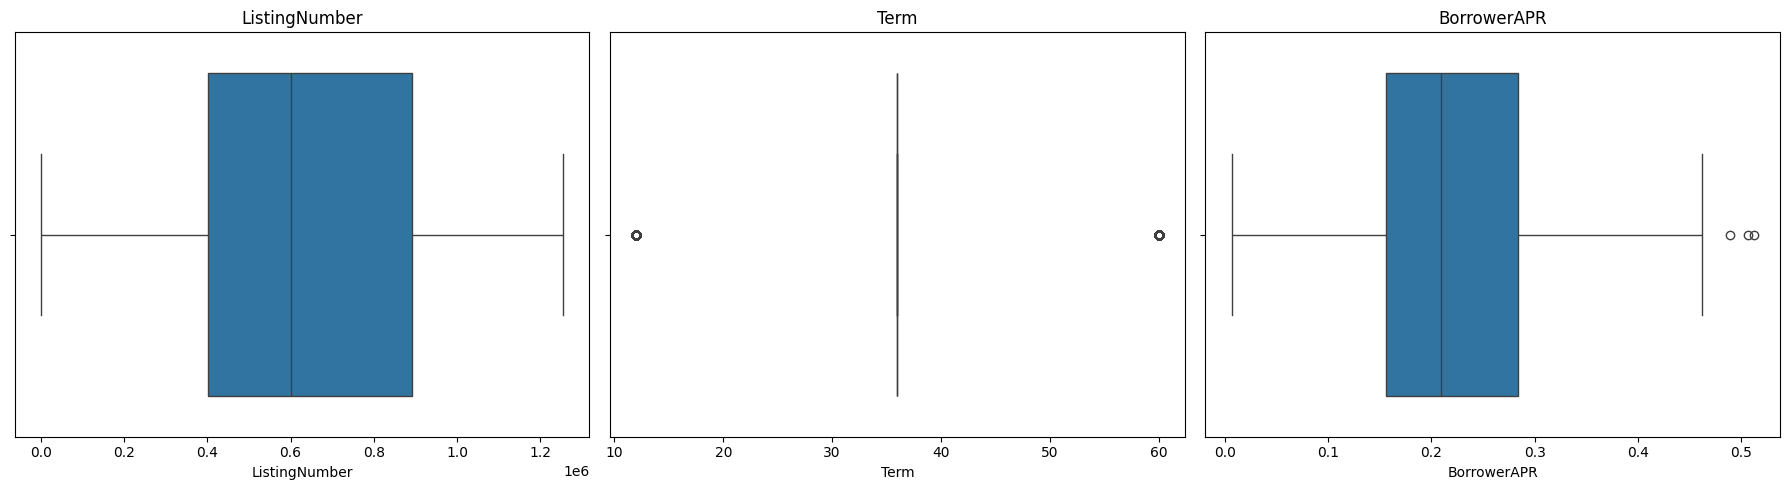

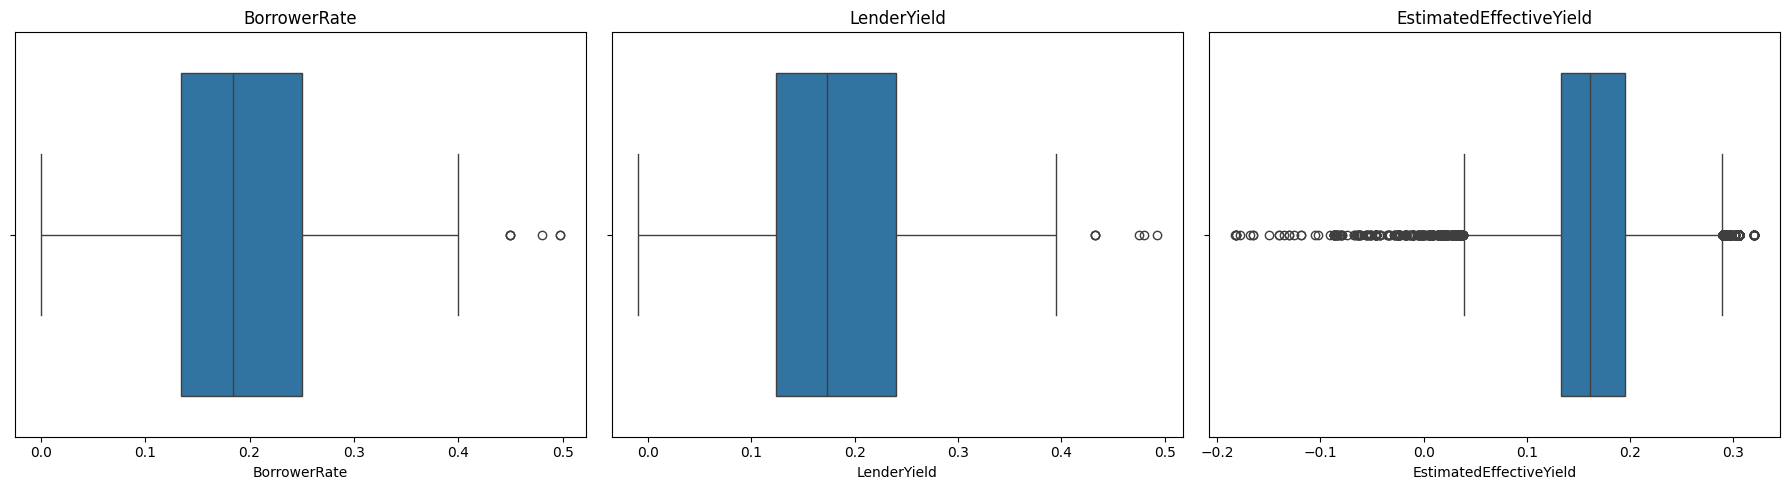

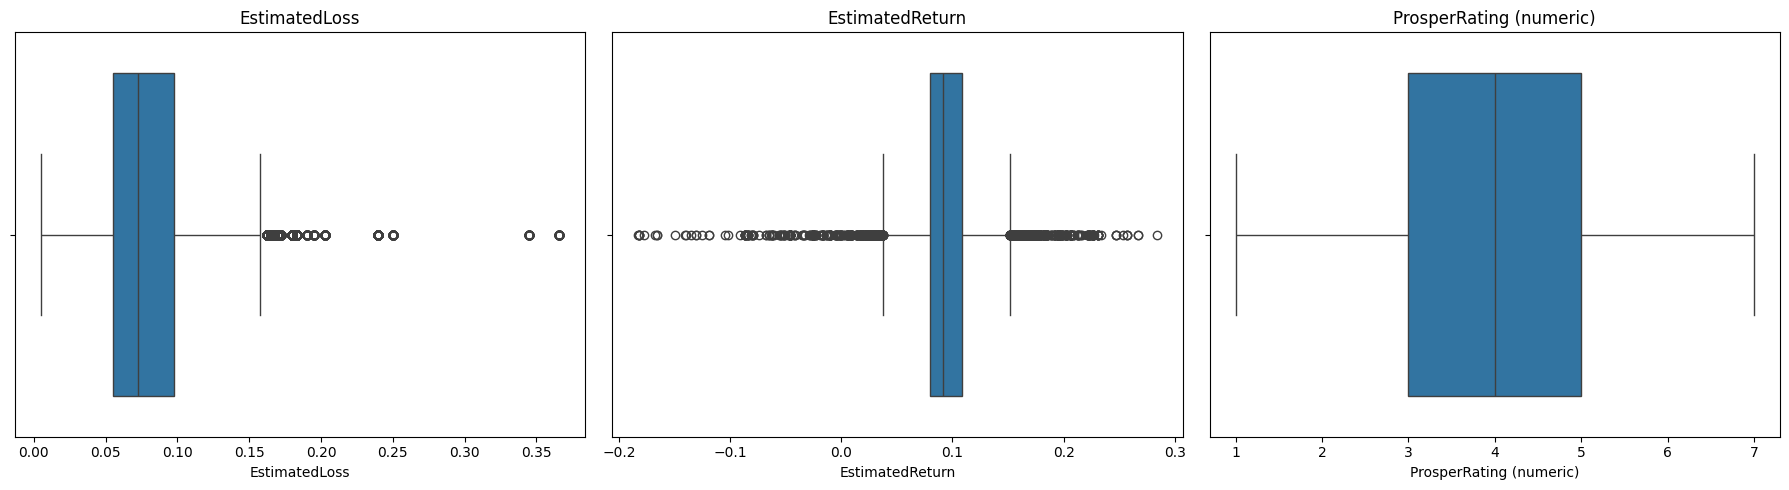

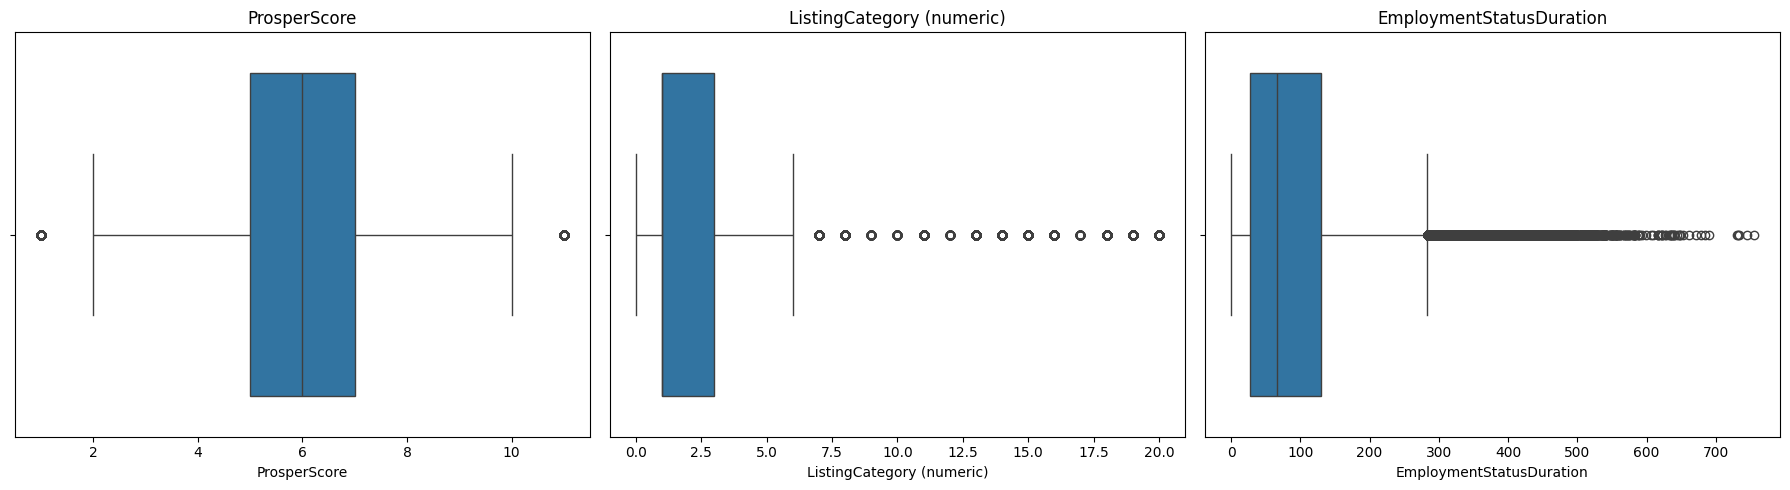

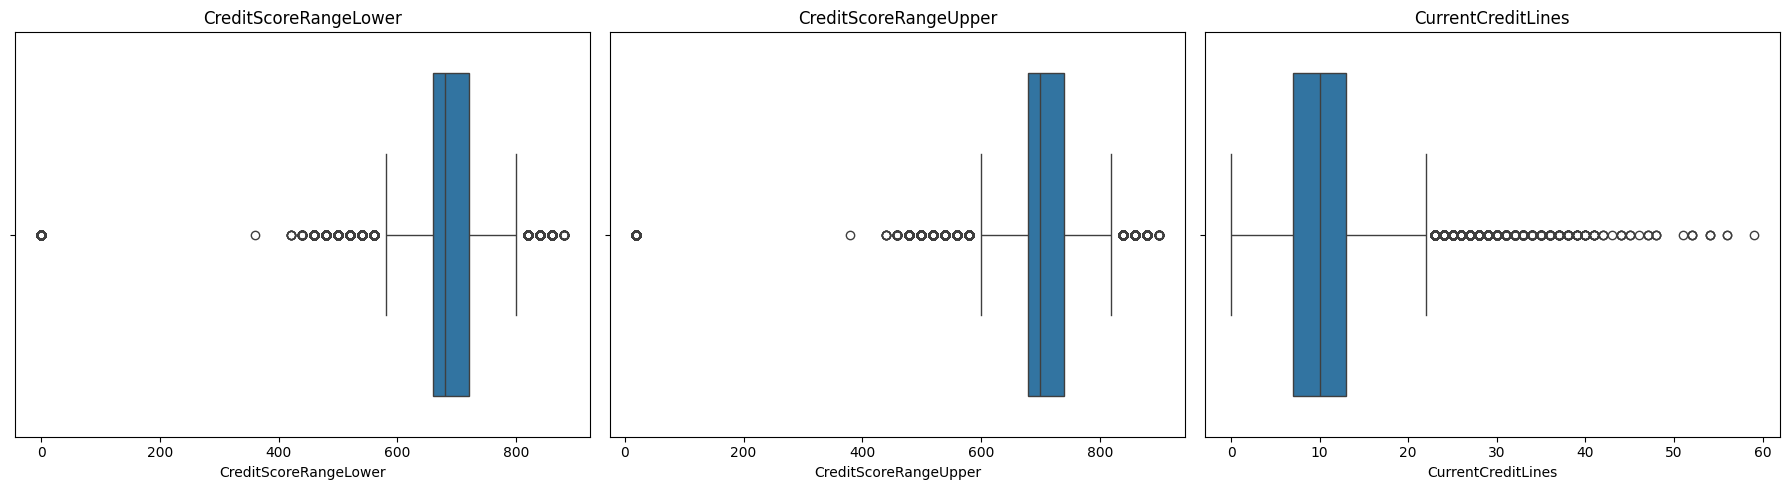

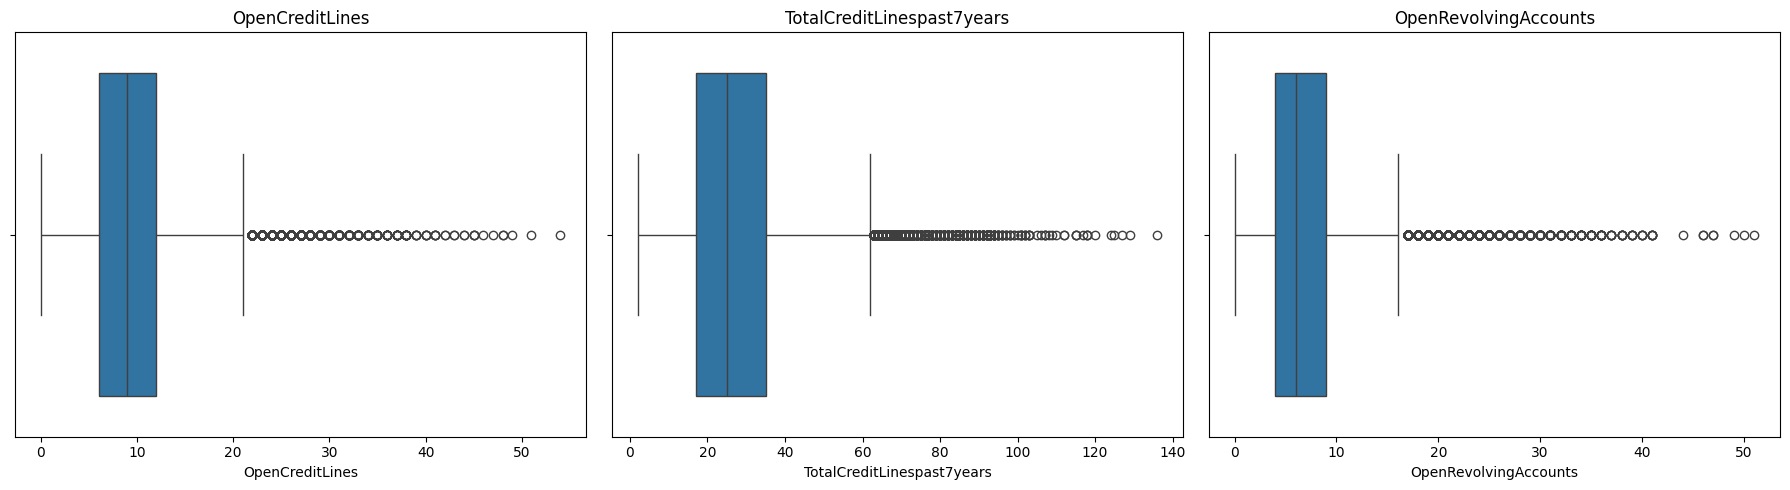

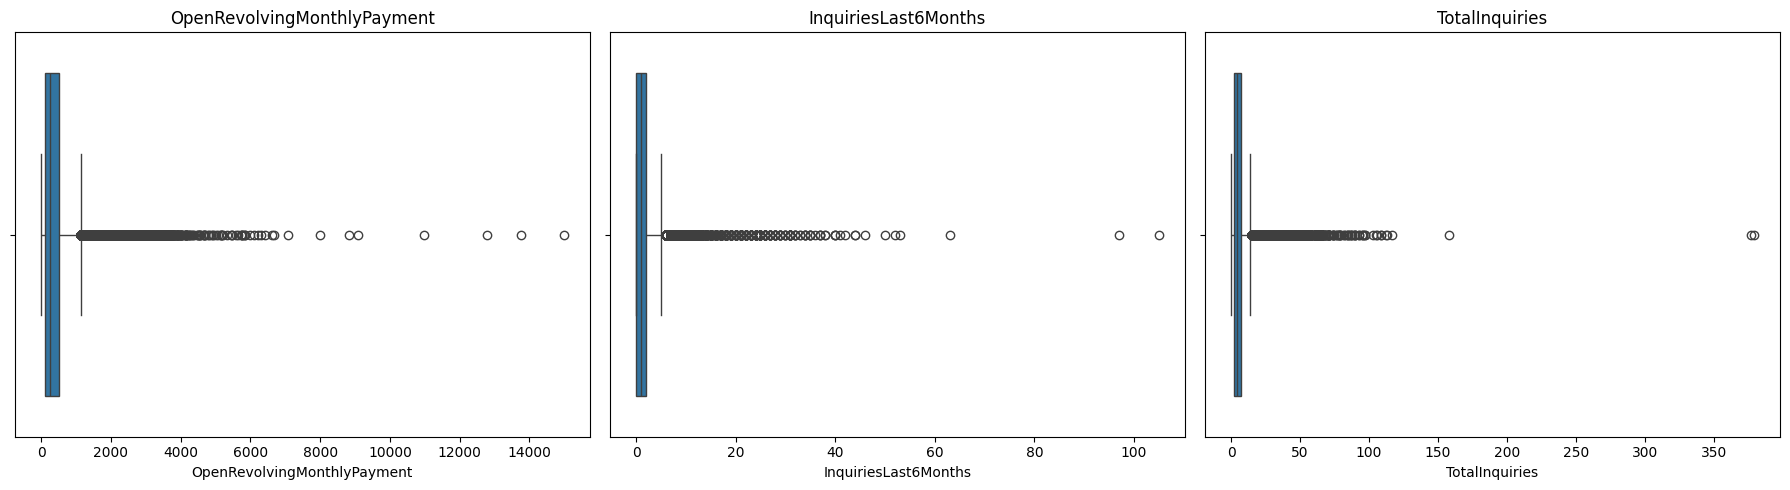

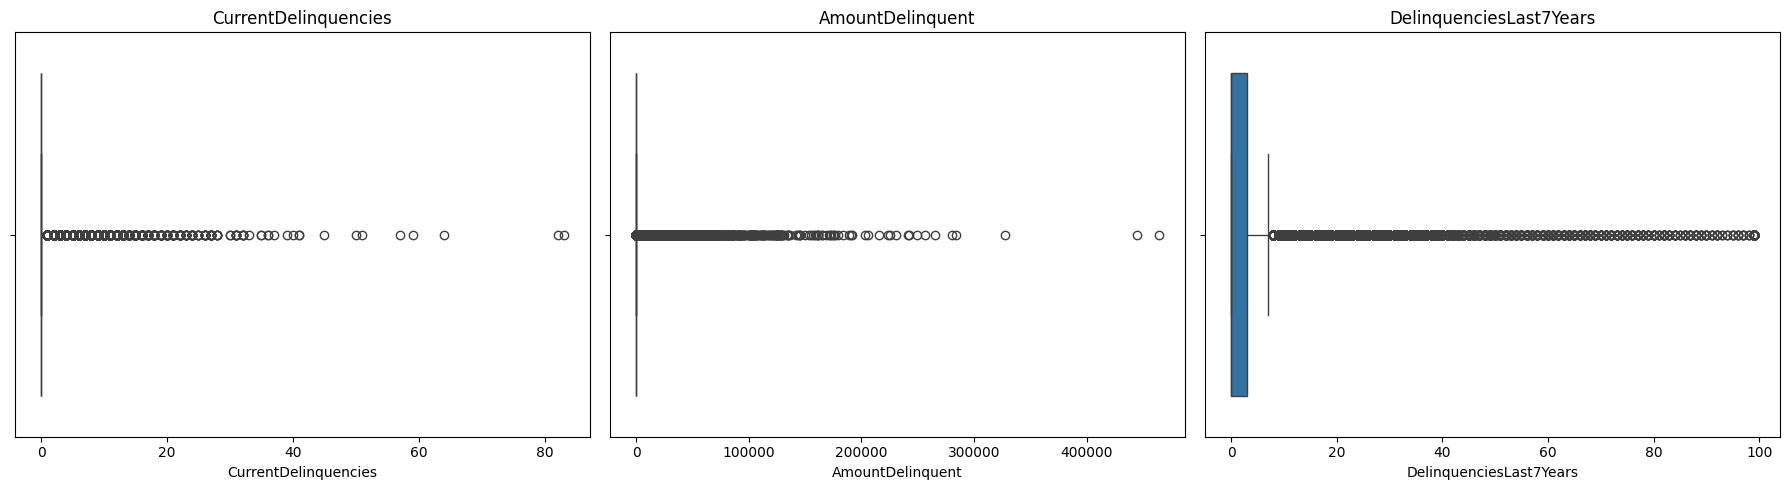

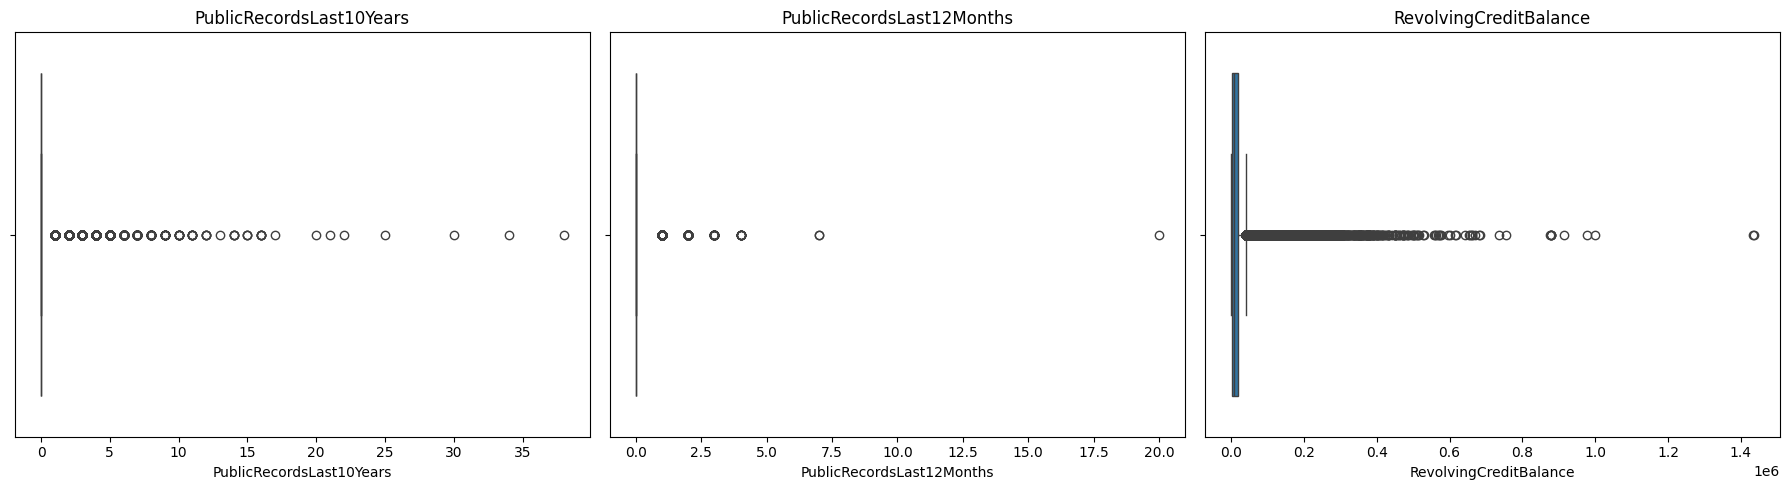

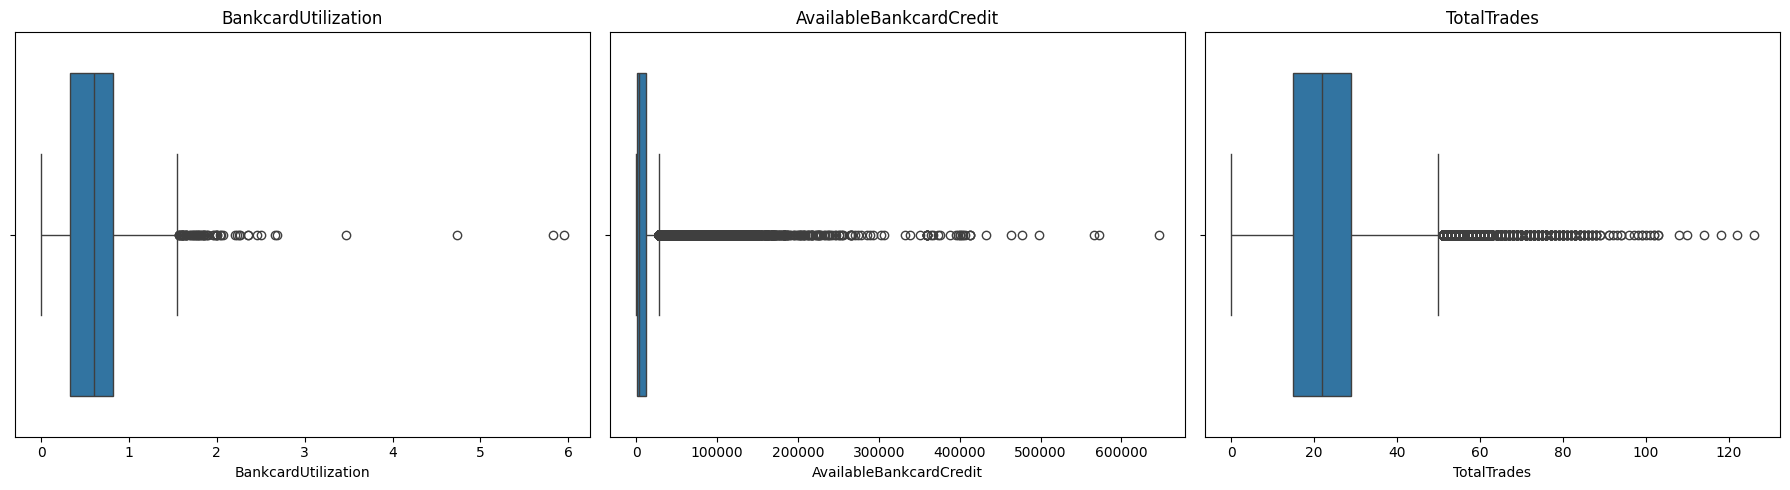

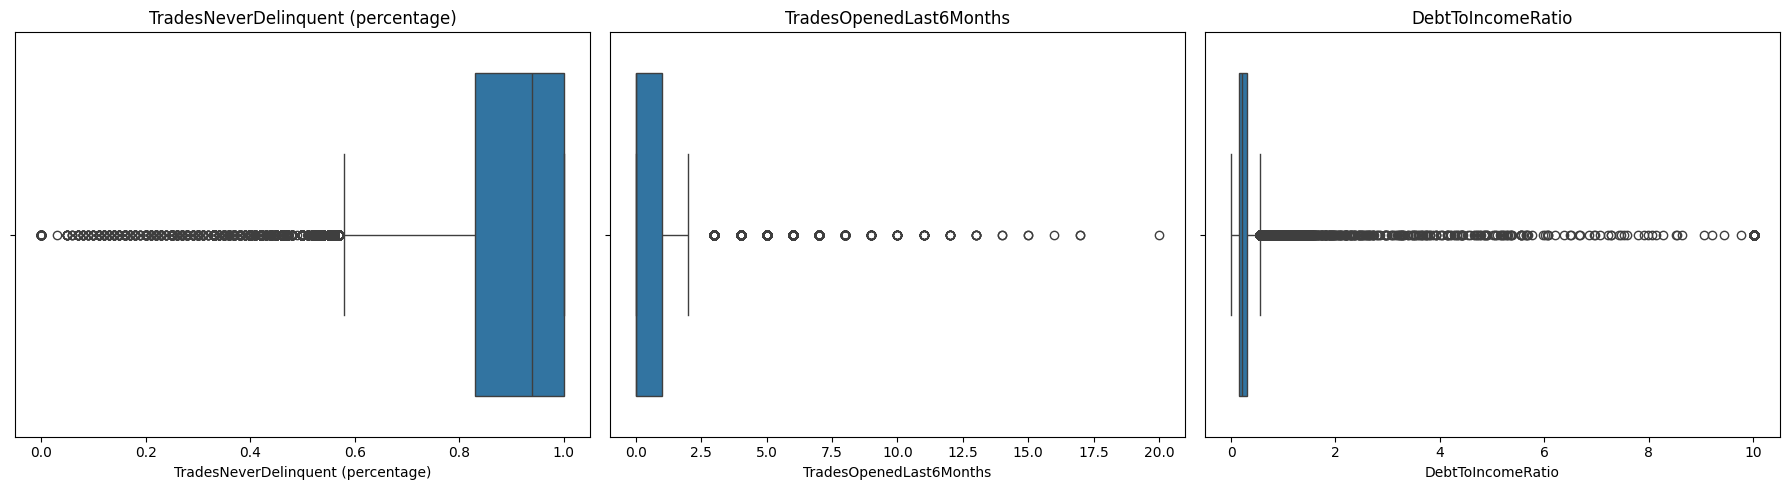

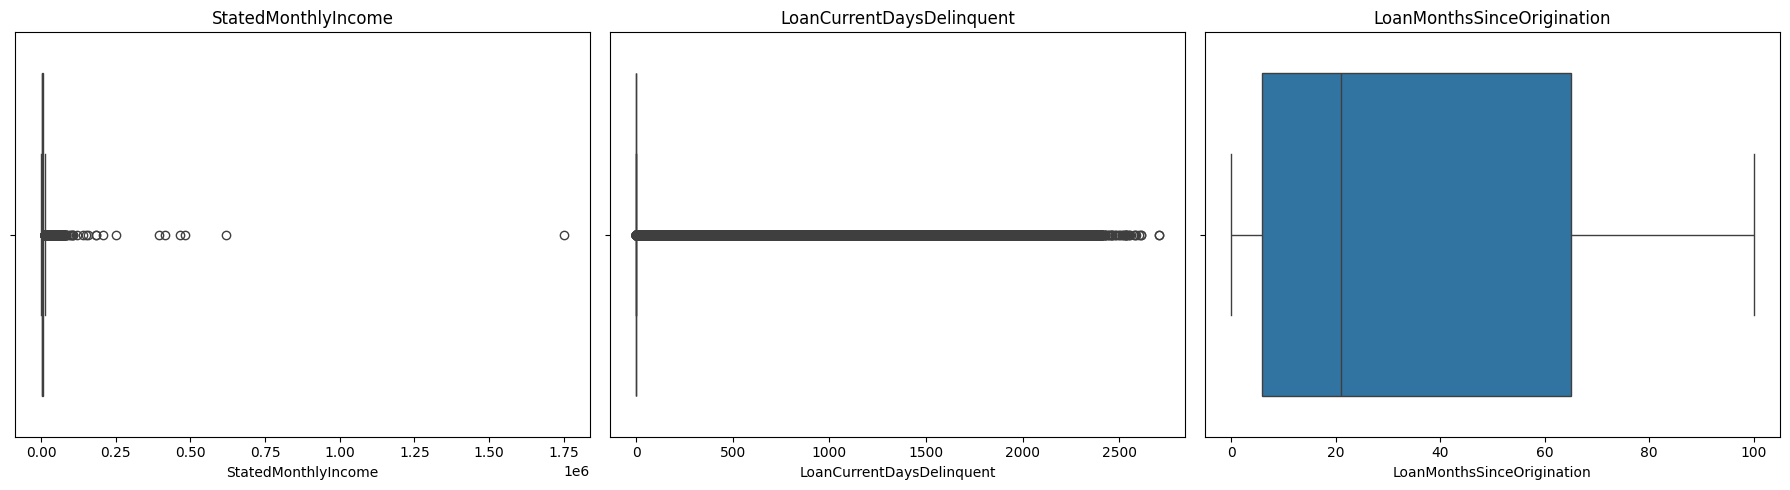

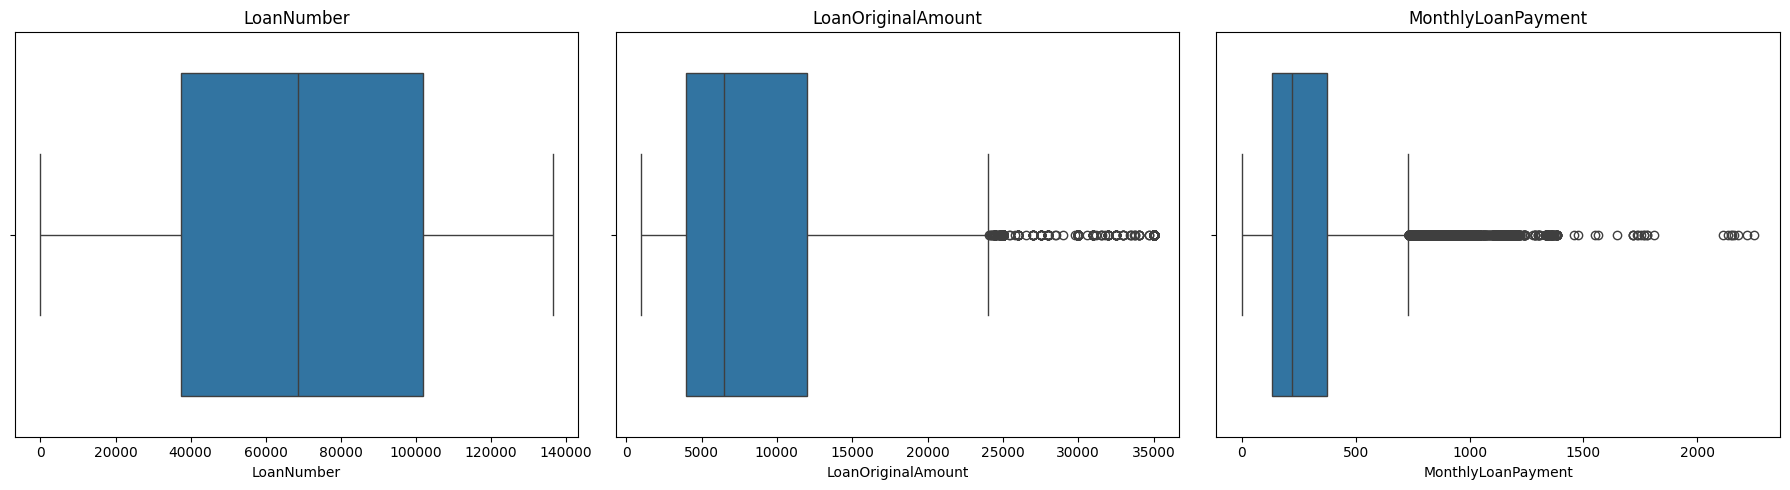

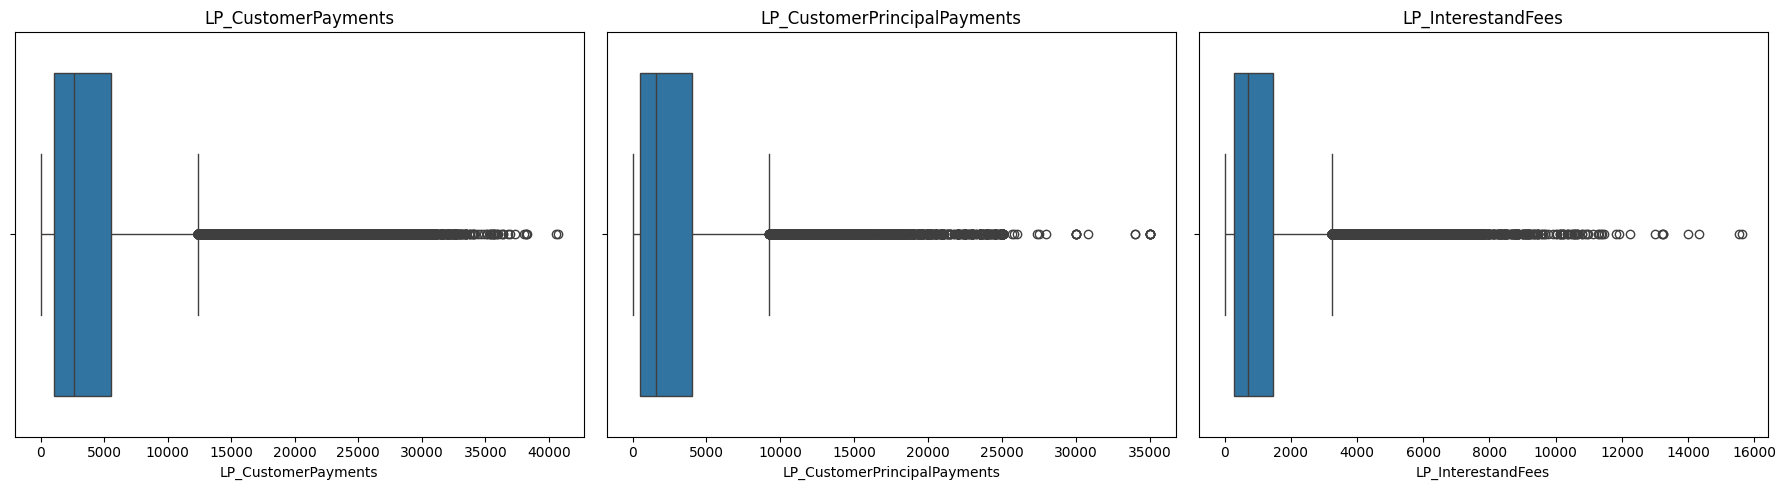

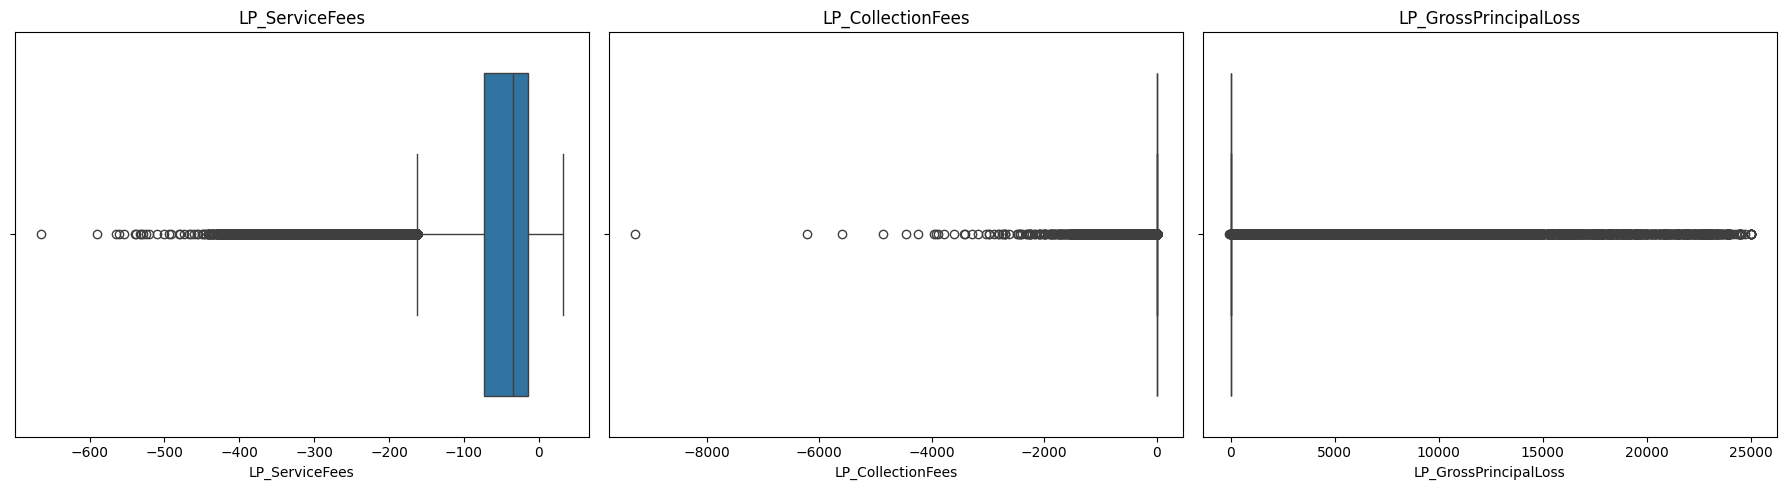

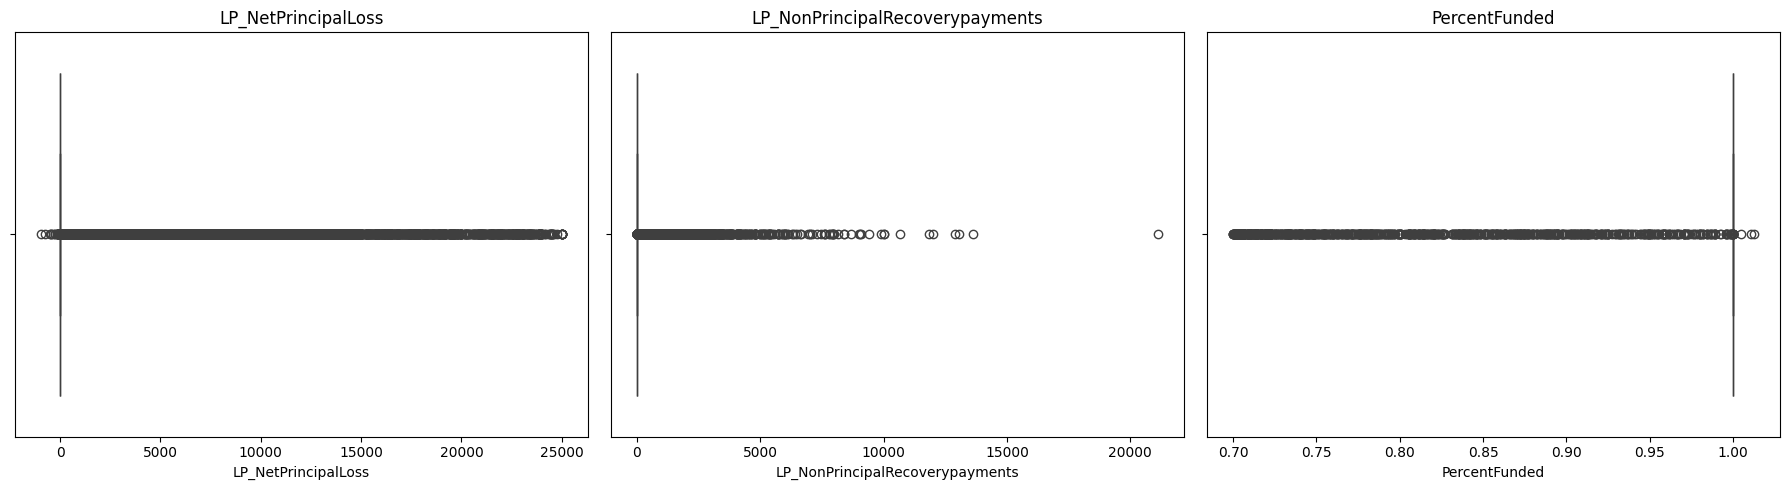

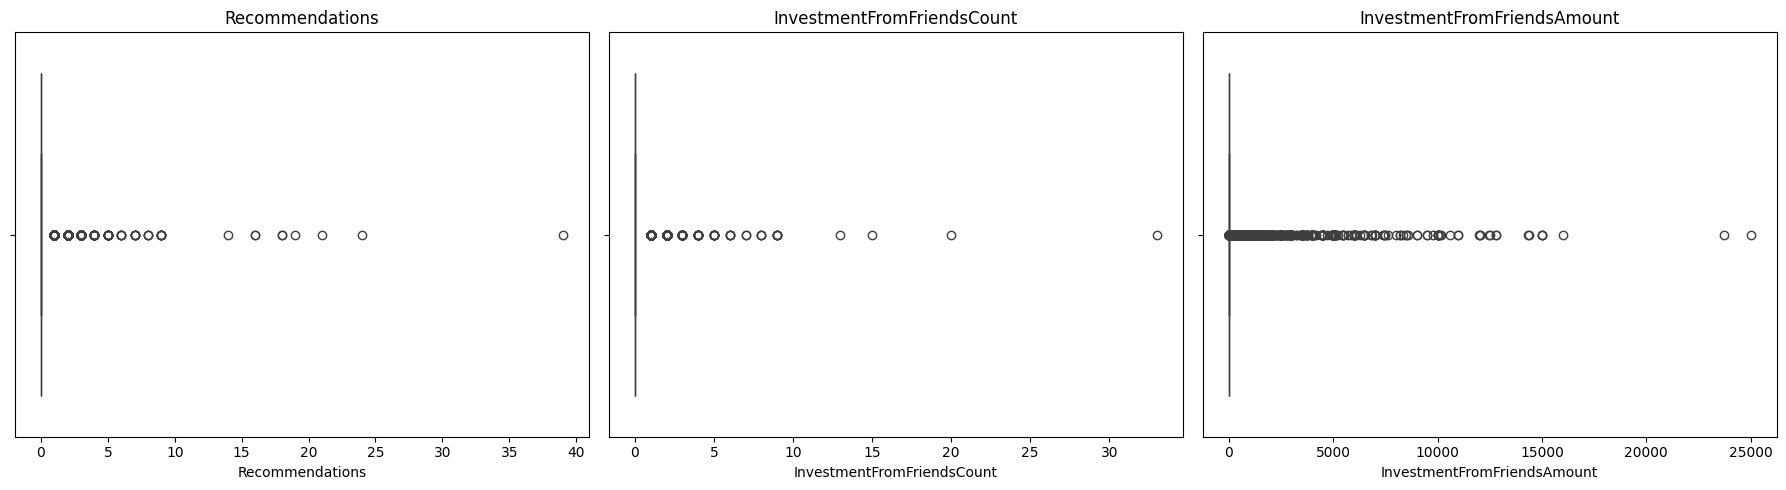

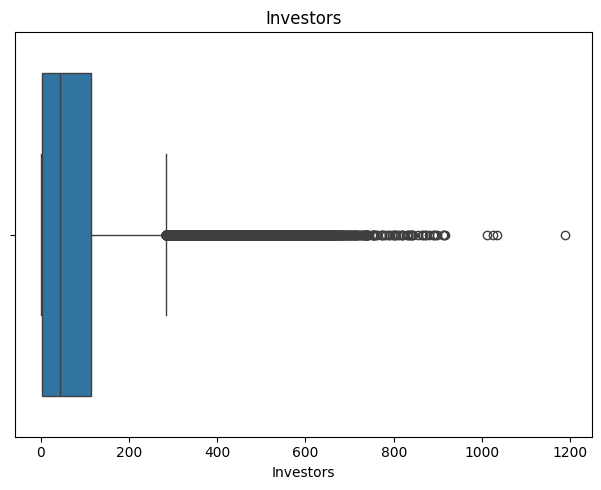

In [ ]:
# Function to create 3 boxplots in one row for columns with outliers

def visualize_outliers_in_rows(data, columns):
    num_cols = 3  # Number of plots per row
    for i in range(0, len(columns), num_cols):
        plt.figure(figsize=(18, 5))  # Adjusting the figure size for 3 plots per row
        for j in range(num_cols):
            if i + j < len(columns):
                plt.subplot(1, num_cols, j + 1)
                sns.boxplot(x=data[columns[i + j]])
                plt.title(f'{columns[i + j]}')
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

# Visualize outliers for numerical columns (3 plots per row)
visualize_outliers_in_rows(loan_data_cleaned, numerical_col)


In [ ]:
# Filter rows with negative values or unrealistic values (e.g., very high amounts)
potential_data_errors = loan_data_cleaned[
    (loan_data_cleaned['LoanOriginalAmount'] < 0) |  # Negative loan amounts
    (loan_data_cleaned['StatedMonthlyIncome'] < 0) |  # Negative income
    (loan_data_cleaned['CreditScoreRangeLower'] < 300) |  # Unrealistic low credit score
    (loan_data_cleaned['CreditScoreRangeUpper'] > 850) |  # Unrealistic high credit score
    (loan_data_cleaned['LoanOriginalAmount'] > 1e7) |  # Extremely high loan amount
    (loan_data_cleaned['StatedMonthlyIncome'] > 1e6)   # Extremely high monthly income
]

# Display the rows that may contain potential data errors
potential_data_errors


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
150,10683423770994576084943,349447,2008-06-12 11:59:55.217,C,36,Completed,2011-04-21,0.08641,0.0830,0.0730,0.16150,0.0724,0.09170,4.0,C,6.0,7,CO,Professional,Full-time,10.0,True,False,2007-08-31 09:17:02.977999872,840.0,859.0,2001-02-17,9.0,8.0,20.0,5,34.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3522.0,0.12,23978.0,19.0,1.00,0.0,0.06,"$50,000-74,999",True,5833.333333,F18E3586903617010B0D95F,0,46,42554,6500,2010-05-19,Q2 2010,A1A33365592404582D03518,204.59,6935.35,6499.99,435.36,-52.43,0.00,0.00,0.00,0.0,1.0,0,0,0.0,290
165,10513478508167781E58455,451142,2010-03-19 13:48:25.113,C,36,Completed,2013-03-30,0.09643,0.0930,0.0830,0.06800,0.0150,0.06800,7.0,AA,8.0,3,CA,Other,Full-time,201.0,True,False,2007-08-31 09:17:02.977999872,840.0,859.0,1982-10-01,18.0,17.0,36.0,18,600.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,21703.0,0.35,38139.0,32.0,1.00,2.0,0.17,"$50,000-74,999",True,5250.000000,FEC23584058352198181803,0,48,41499,9000,2010-03-30,Q1 2010,3F5034778147415220AABFB,283.91,10352.11,8999.99,1352.12,-145.38,0.00,0.00,0.00,0.0,1.0,0,0,0.0,413
185,2D593491034220560C1708E,469092,2010-07-29 16:13:12.967,C,36,Defaulted,2012-05-10,0.27119,0.2365,0.2265,0.13410,0.0870,0.13410,4.0,C,6.0,1,CA,Teacher,Self-employed,3.0,True,False,2007-08-31 09:17:02.977999872,860.0,879.0,1999-10-08,5.0,5.0,9.0,4,267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2785.0,0.06,39615.0,9.0,1.00,0.0,0.22,"$25,000-49,999",False,3333.333333,74323594369048749C7F0D6,150,43,43843,6000,2010-08-09,Q3 2010,367B348955246532073DD98,234.30,3748.80,2155.59,1593.21,-67.39,0.00,3844.41,3844.41,685.0,1.0,0,0,0.0,243
196,10B03560492883055C87101,656502,2012-10-18 14:53:24.960,C,60,Current,NaT,0.15752,0.1346,0.1246,0.12050,0.0299,0.09060,6.0,A,9.0,19,NY,Other,Employed,89.0,True,False,2007-08-31 09:17:02.977999872,840.0,859.0,1992-01-07,6.0,5.0,17.0,4,420.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,5544.0,0.11,40956.0,17.0,0.94,0.0,0.04,"$100,000+",True,33333.333333,43C23665290560530B80B44,0,17,76698,25000,2012-10-29,Q4 2012,FA2435615582268594CA3CF,574.73,9195.68,5124.19,4071.49,-302.48,0.00,0.00,0.00,0.0,1.0,0,0,0.0,34
423,41343423416791445E5654C,348447,2008-06-10 23:21:11.103,AA,36,Chargedoff,2009-10-19,0.15934,0.1522,0.1422,0.16150,0.0724,0.09170,4.0,C,6.0,3,CA,Executive,Full-time,24.0,True,False,2008-06-10 22:55:11.993000000,840.0,859.0,1981-05-01,14.0,14.0,30.0,13,787.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,33528.0,0.23,110522.0,28.0,1.00,1.0,0.15,"$100,000+",True,10958.333333,385734240376702038058A1,1726,69,32947,25000,2008-06-18,Q2 2008,A5823424091387442133B18,869.33,9562.63,6478.10,3084.53,-202.66,0.00,18521.90,18521.90,0.0,1.0,0,0,0.0,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# Imputing unrealistic values with reasonable defaults

# Set a cap for LoanOriginalAmount and StatedMonthlyIncome
loan_data_cleaned['LoanOriginalAmount'] = loan_data_cleaned['LoanOriginalAmount'].clip(upper=1e7)
loan_data_cleaned['StatedMonthlyIncome'] = loan_data_cleaned['StatedMonthlyIncome'].clip(upper=1e6)

# Set realistic values for credit scores
loan_data_cleaned['CreditScoreRangeLower'] = loan_data_cleaned['CreditScoreRangeLower'].clip(lower=300)
loan_data_cleaned['CreditScoreRangeUpper'] = loan_data_cleaned['CreditScoreRangeUpper'].clip(upper=850)


### Summary

1. **Outlier Detection**: The function `detect_outliers` uses the Interquartile Range (IQR) method to detect outliers for specified numerical columns. It calculates the lower and upper bounds and identifies values that fall outside these bounds as outliers.
   
2. **Visualization**: The function `visualize_outliers_in_rows` creates boxplots for the numerical columns, displaying three plots per row to visualize outliers.

3. **Data Cleaning for Unrealistic Values**: The code filters rows with potential data errors, such as negative loan amounts, negative income, unrealistic credit scores (below 300 or above 850), and very high loan amounts or incomes.

4. **Imputation**: Unrealistic values are imputed with reasonable defaults:
   - Loan amounts are capped at 10M.
   - Monthly income is capped at 1M.
   - Credit scores are clipped between 300 and 850.

5. **Numerical Columns Identification**: It identifies all numerical columns in the dataset to apply the outlier detection function, and filters columns with outliers for further review.


### Checking for duplicate Values

In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = loan_data_cleaned.duplicated()

# Count and display the number of duplicate rows
duplicate_count = duplicate_rows.sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


#### No Duplicate values can be Founded from the dataset.

## Data Transformation

In [ ]:
# Identify numerical columns
numerical_columns = loan_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate the skewness for each numerical column
skewness = loan_data_cleaned[numerical_columns].skew()

# Filter and display highly skewed columns (skewness > 1 or skewness < -1)
highly_skewed_columns = skewness[abs(skewness) > 1]
highly_skewed_columns.sort_values(ascending=False)  # Sort to view the most skewed columns first

# Display the skewed columns and their skewness values
highly_skewed_columns


,0
EstimatedLoss,1.010658
ListingCategory (numeric),2.447442
EmploymentStatusDuration,1.686151
CreditScoreRangeUpper,-1.633670
CurrentCreditLines,1.072502
OpenCreditLines,1.107279
OpenRevolvingAccounts,1.312924
OpenRevolvingMonthlyPayment,3.775663
InquiriesLast6Months,5.676315
TotalInquiries,7.060537


In [ ]:
# Columns identified for log transformation (for right-skewed data)
columns_log_transform = [
    'StatedMonthlyIncome', 'DebtToIncomeRatio', 'AmountDelinquent', 'RevolvingCreditBalance',
    'AvailableBankcardCredit', 'LP_NetPrincipalLoss', 'LP_GrossPrincipalLoss', 'LP_NonPrincipalRecoverypayments'
]

# Columns identified for square root transformation (for moderately skewed data)
columns_square_root_transform = [
    'PercentFunded', 'LP_CollectionFees', 'Recommendations'
]

# Apply log transformation (handling zeros and negative values)
for col in columns_log_transform:
    loan_data_cleaned[col] = loan_data_cleaned[col].fillna(0)  # Handle NaNs
    loan_data_cleaned[col] = loan_data_cleaned[col].clip(lower=0)  # Clip negative values
    loan_data_cleaned[f'Log_{col}'] = np.log1p(loan_data_cleaned[col])  # Apply log1p to handle zeros safely

# Apply square root transformation (handling zeros and negative values)
for col in columns_square_root_transform:
    loan_data_cleaned[col] = loan_data_cleaned[col].fillna(0)  # Handle NaNs
    loan_data_cleaned[col] = loan_data_cleaned[col].clip(lower=0)  # Clip negative values
    loan_data_cleaned[f'Sqrt_{col}'] = np.sqrt(loan_data_cleaned[col])

# Display the transformed columns
transformed_columns = [f'Log_{col}' for col in columns_log_transform] + [f'Sqrt_{col}' for col in columns_square_root_transform]
loan_data_cleaned[transformed_columns].head()


,Log_StatedMonthlyIncome,Log_DebtToIncomeRatio,Log_AmountDelinquent,Log_RevolvingCreditBalance,Log_AvailableBankcardCredit,Log_LP_NetPrincipalLoss,Log_LP_GrossPrincipalLoss,Log_LP_NonPrincipalRecoverypayments,Sqrt_PercentFunded,Sqrt_LP_CollectionFees,Sqrt_Recommendations
0,8.034091,0.157004,6.159095,0.000000,7.313887,0.0,0.0,0.0,1.0,0.0,0.0
1,8.720297,0.165514,0.000000,8.291547,9.236690,0.0,0.0,0.0,1.0,0.0,0.0
2,7.642204,0.058269,0.000000,9.053687,8.318986,0.0,0.0,0.0,1.0,0.0,0.0
3,7.964156,0.139762,9.216024,7.275865,10.333808,0.0,0.0,0.0,1.0,0.0,0.0
4,9.167885,0.231112,0.000000,8.731336,6.545350,0.0,0.0,0.0,1.0,0.0,0.0


### Summary :

#### 1. Identifying Skewed Data:
   - The first code snippet identifies numerical columns in the dataset and calculates their **skewness**.
   - **Skewness** measures how asymmetrical a distribution is:
     - **Positive skewness (>1)**: Right-skewed, meaning a long tail on the right.
     - **Negative skewness (<-1)**: Left-skewed, meaning a long tail on the left.
   - The code filters and displays columns with a skewness value greater than 1 or less than -1 (highly skewed columns).
   - **Output**: A list of columns with high skewness, sorted by the degree of skewness.

#### 2. Transforming the Skewed Data:
   - The second code snippet applies transformations to the skewed data identified in the first step:
     - **Log Transformation**: Used for right-skewed data to compress the range and make the data more normally distributed. This is applied to columns like `StatedMonthlyIncome`, `DebtToIncomeRatio`, `AmountDelinquent`, etc.
     - **Square Root Transformation**: Applied to moderately skewed data (less skewed than those requiring log transformation). This is applied to columns like `PercentFunded`, `LP_CollectionFees`, etc.
   - **Handling NaNs and Negative Values**:
     - NaN values are filled with `0`.
     - Negative values are clipped to `0` to prevent issues when applying logarithmic or square root transformations, as these operations do not support negative values.
   - **Result**: New columns are created for the transformed data:
     - Columns prefixed with **`Log_`** are the log-transformed versions of highly skewed columns.
     - Columns prefixed with **`Sqrt_`** are the square root-transformed versions of moderately skewed columns.

### Key Points:
- **Log Transformation**: Effective for right-skewed data; compresses extreme values.
- **Square Root Transformation**: Less aggressive transformation for moderately skewed data.
- **NaN and Negative Values Handling**: Ensures no errors occur during transformations by replacing NaNs and negative values with `0`.




In [ ]:
# Checking for Null Values Again
null = loan_data_cleaned.isnull().sum()
null[null>0]

,0
ClosedDate,58868


# Data Encoding

In [ ]:
# Cheking for the categorical values of loan_status column
loan_data_cleaned['LoanStatus'].value_counts()

,count
LoanStatus,
Current,56576
Completed,38074
Chargedoff,11992
Defaulted,5018
Past Due (1-15 days),806
Past Due (31-60 days),363
Past Due (61-90 days),313
Past Due (91-120 days),304
Past Due (16-30 days),265


In [ ]:
# Creating a Copy
loan_en = loan_data_cleaned.copy()

In [ ]:
# Encoding based on mean LoanOriginalAmount for each status
loan_status_target_means = loan_en.groupby('LoanStatus')['LoanOriginalAmount'].mean()

# Map these values to the original LoanStatus column
loan_en['LoanStatus_TargetEncoded'] = loan_en['LoanStatus'].map(loan_status_target_means)

# Display the first few rows
loan_en[['LoanStatus', 'LoanStatus_TargetEncoded']].head()


,LoanStatus,LoanStatus_TargetEncoded
0,Completed,6189.093239
1,Current,10360.835018
2,Completed,6189.093239
3,Current,10360.835018
4,Current,10360.835018


In [ ]:
loan_status_map = {
    'Current': 1,
    'Completed': 0,
    'Cancelled': 0,
    'Defaulted': 3,
    'Past Due (1-15 days)': 2,
    'Past Due (16-30 days)': 2,
    'Past Due (31-60 days)': 2,
    'Past Due (61-90 days)': 2,
    'Past Due (91-120 days)': 2,
    'Past Due (>120 days)': 3
}

# Apply the ordinal encoding
loan_en['LoanStatus_Encoded_ontargetmap'] = loan_en['LoanStatus'].map(loan_status_map)

# Display the first few rows
loan_en[['LoanStatus', 'LoanStatus_Encoded_ontargetmap']].head()


,LoanStatus,LoanStatus_Encoded_ontargetmap
0,Completed,0.0
1,Current,1.0
2,Completed,0.0
3,Current,1.0
4,Current,1.0


In [ ]:
def categorize_loan_status(status):
    if 'Current' in status:
        return 'Active'
    elif 'Completed' in status or 'Cancelled' in status:
        return 'Closed'
    elif 'Defaulted' in status:
        return 'Defaulted'
    elif 'Past Due' in status:
        return 'Delinquent'
    else:
        return 'Other'

# Apply the categorization function
loan_en['LoanStatus_Categorized'] = loan_en['LoanStatus'].apply(categorize_loan_status)

# Display the first few rows
loan_en[['LoanStatus', 'LoanStatus_Categorized']].head()


,LoanStatus,LoanStatus_Categorized
0,Completed,Closed
1,Current,Active
2,Completed,Closed
3,Current,Active
4,Current,Active


In [ ]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Label encode the LoanStatus column
loan_en['LoanStatus_Encoded1'] = label_encoder.fit_transform(loan_en['LoanStatus'])

# Display the first few rows to check the encoding
loan_en[['LoanStatus', 'LoanStatus_Encoded1']].value_counts()


,,count
LoanStatus,LoanStatus_Encoded1,
Current,3,56576
Completed,2,38074
Chargedoff,1,11992
Defaulted,4,5018
Past Due (1-15 days),6,806
Past Due (31-60 days),8,363
Past Due (61-90 days),9,313
Past Due (91-120 days),10,304
Past Due (16-30 days),7,265


In [ ]:
# First, create the binary 'Status' based on the ClosedDate column
loan_en['LoanStatus1'] = loan_en['ClosedDate'].apply(lambda x: 1 if pd.isnull(x) else 0)

# Second, update the 'Status' column based on the LoanCurrentDaysDelinquent column
loan_en['LoanStatus2'] = loan_en['LoanCurrentDaysDelinquent'].apply(lambda x: 1 if x > 180 else 0)



In [ ]:
# Displaying the encoded columns
loan_en[['ClosedDate', 'LoanCurrentDaysDelinquent','LoanStatus_TargetEncoded','LoanStatus_Encoded_ontargetmap',
         'LoanStatus_Categorized','LoanStatus_Encoded1','LoanStatus1','LoanStatus2']].head()

,ClosedDate,LoanCurrentDaysDelinquent,LoanStatus_TargetEncoded,LoanStatus_Encoded_ontargetmap,LoanStatus_Categorized,LoanStatus_Encoded1,LoanStatus1,LoanStatus2
0,2009-08-14,0,6189.093239,0.0,Closed,2,0,0
1,NaT,0,10360.835018,1.0,Active,3,1,0
2,2009-12-17,0,6189.093239,0.0,Closed,2,0,0
3,NaT,0,10360.835018,1.0,Active,3,1,0
4,NaT,0,10360.835018,1.0,Active,3,1,0


### Summary of the Data Encoding Process

1. **Checking Loan Status Values**:
   - The unique values and counts in the `LoanStatus` column are examined using `value_counts()` to understand the distribution of loan statuses.

2. **Target Encoding**:
   - A copy of the dataset is created (`loan_en`), and **target encoding** is applied to `LoanStatus` based on the mean `LoanOriginalAmount` for each status. The result is stored in the column `LoanStatus_TargetEncoded`.

3. **Ordinal Encoding**:
   - A predefined mapping (`loan_status_map`) is created to ordinally encode the `LoanStatus` values, assigning different numeric values based on the risk level (e.g., `Defaulted` = 3, `Current` = 1). The encoded values are stored in `LoanStatus_Encoded_ontargetmap`.

4. **Categorical Grouping**:
   - A custom function `categorize_loan_status` groups loan statuses into broader categories (`Active`, `Closed`, `Defaulted`, `Delinquent`, `Other`). This is useful for higher-level analysis and stored in `LoanStatus_Categorized`.

5. **Label Encoding**:
   - Using `LabelEncoder`, the `LoanStatus` column is encoded into integer labels and stored as `LoanStatus_Encoded1`.

6. **Binary Encoding**:
   - Two binary encodings are created:
     - **LoanStatus1**: Encodes based on whether the `ClosedDate` is null (indicating the loan is open).
     - **LoanStatus2**: Encodes based on whether the loan has been delinquent for more than 180 days.

7. **Display Encoded Columns**:
   - A table displaying all the newly encoded columns is generated, showing different types of encoding applied to the `LoanStatus` column, including target encoding, ordinal encoding, categorical grouping, label encoding, and binary encoding.


# Saving the Encoded and Cleaned Dataset

In [ ]:
loan_data_cleaned.to_csv('loan_data_cleaned.csv', index=False)
loan_en.to_csv('loan_encoded.csv', index=False)



ClosedDate    58868
dtype: int64